<a href="https://colab.research.google.com/github/roquearmas/IABD_DATA/blob/main/RAM_Fahrenheit2Celsius_Exportaci%C3%B3n_JS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fahrenheit --> Celsius

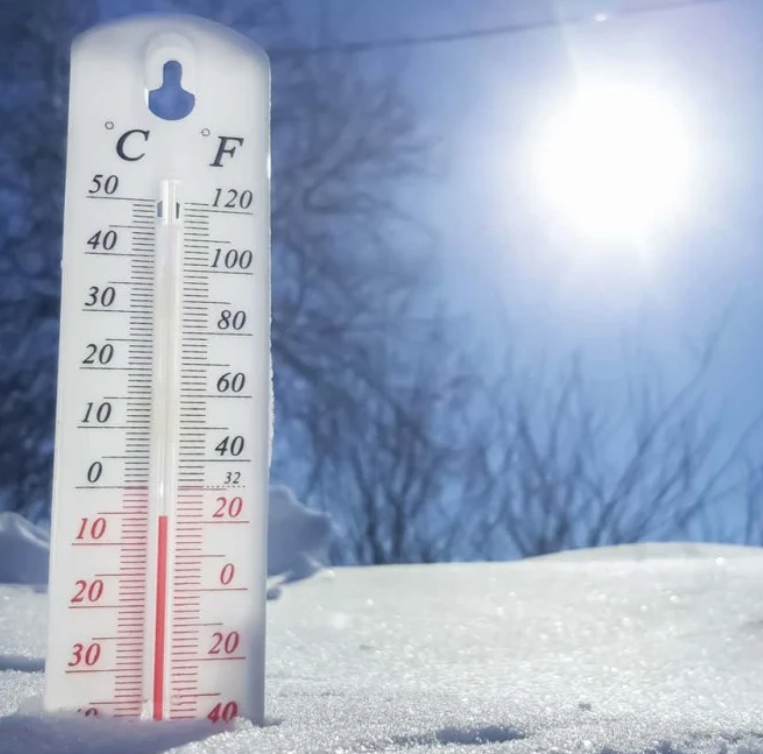

[Derechos de la imagen](https://lifehacker.com/como-convertir-grados-celsius-a-fahrenheit-sin-hacer-ca-1849207223)



Exportación a TensorFlow.js de modelo de predicción que, en base a dos arrays, genera correspondencia de grados Fahrenheit a Celsius.

Importación de librerías


In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split

Generación de los arrays


In [ ]:
#todo desde cero: https://youtu.be/iX_on3VxZzk

#celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
celsius = np.array(np.random.uniform(-40.0, 40.0, 1100), dtype=float)
fahrenheit = (celsius * 9/5) + 32

Comprobación de que el array está bien generado

In [ ]:
for i in range(100):
  celsius_calculado = (fahrenheit[i] - 32) * 5/9
  print(f"{fahrenheit[i]:.2f} grados Fahrenheit son {celsius_calculado:.2f} grados Celsius, (en array {celsius[i]:.2f})")


22.26 grados Fahrenheit son -5.41 grados Celsius, (en array -5.41)
61.55 grados Fahrenheit son 16.41 grados Celsius, (en array 16.41)
-33.57 grados Fahrenheit son -36.43 grados Celsius, (en array -36.43)
26.45 grados Fahrenheit son -3.08 grados Celsius, (en array -3.08)
7.33 grados Fahrenheit son -13.71 grados Celsius, (en array -13.71)
72.90 grados Fahrenheit son 22.72 grados Celsius, (en array 22.72)
-1.16 grados Fahrenheit son -18.42 grados Celsius, (en array -18.42)
-26.48 grados Fahrenheit son -32.49 grados Celsius, (en array -32.49)
66.46 grados Fahrenheit son 19.14 grados Celsius, (en array 19.14)
96.60 grados Fahrenheit son 35.89 grados Celsius, (en array 35.89)
-0.28 grados Fahrenheit son -17.94 grados Celsius, (en array -17.94)
103.87 grados Fahrenheit son 39.93 grados Celsius, (en array 39.93)
-5.31 grados Fahrenheit son -20.73 grados Celsius, (en array -20.73)
-24.26 grados Fahrenheit son -31.25 grados Celsius, (en array -31.25)
51.17 grados Fahrenheit son 10.65 grados Cels

In [ ]:
def rmse(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean((y_true - y_pred)**2))

Creación del modelo

In [ ]:
oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])
oculta2 = tf.keras.layers.Dense(units=3)
salida = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta1, oculta2, salida])

modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.01),
    loss='mean_squared_error' ,  metrics=[rmse]
)

Entrenamiento del modelo


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(fahrenheit, celsius, test_size=0.2, random_state=42)
print("Comenzando entrenamiento...")
historial = modelo.fit(X_train,y_train, epochs=70, validation_split = 0.05,verbose=True)


Comenzando entrenamiento...
Epoch 1/70
27/27 [==============================] - 1s 11ms/step - loss: 186.6026 - rmse: 13.3452 - val_loss: 220.3493 - val_rmse: 14.8264
Epoch 2/70
27/27 [==============================] - 0s 5ms/step - loss: 152.4610 - rmse: 11.9209 - val_loss: 189.7373 - val_rmse: 13.7592
Epoch 3/70
27/27 [==============================] - 0s 5ms/step - loss: 129.4994 - rmse: 11.3854 - val_loss: 159.5948 - val_rmse: 12.6150
Epoch 4/70
27/27 [==============================] - 0s 5ms/step - loss: 104.9634 - rmse: 10.1669 - val_loss: 123.6706 - val_rmse: 11.0992
Epoch 5/70
27/27 [==============================] - 0s 4ms/step - loss: 75.8862 - rmse: 8.6044 - val_loss: 78.0706 - val_rmse: 8.8253
Epoch 6/70
27/27 [==============================] - 0s 4ms/step - loss: 44.1504 - rmse: 6.6085 - val_loss: 36.6134 - val_rmse: 6.0490
Epoch 7/70
27/27 [==============================] - 0s 4ms/step - loss: 18.2308 - rmse: 4.1668 - val_loss: 10.0735 - val_rmse: 3.1752
Epoch 8/70
27/27 

definir funciones de loss y accuracy

In [ ]:
def plot_acc(history, title="Precisión del modelo (RMSE)"):
  """Imprime una gráfica mostrando la accuracy por epoch obtenida en un entrenamiento"""
  plt.plot(history.history['rmse'])
  plt.plot(history.history['val_rmse'])
  plt.title(title)
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

def plot_loss(history, title="Pérdida del modelo"):
  """Imprime una gráfica mostrando la pérdida por epoch obtenida en un entrenamiento"""
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title(title)
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper right')
  plt.show()

Muestro las gráficas

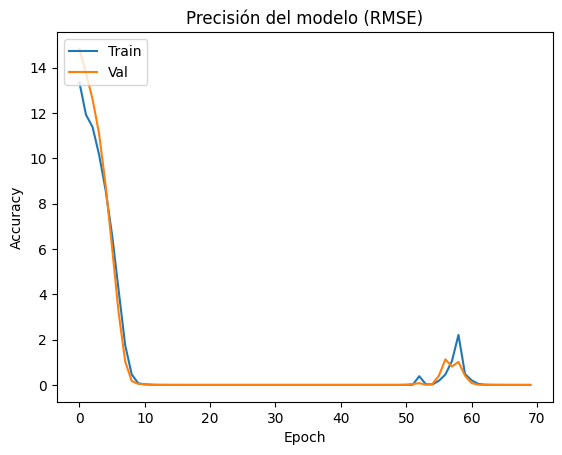

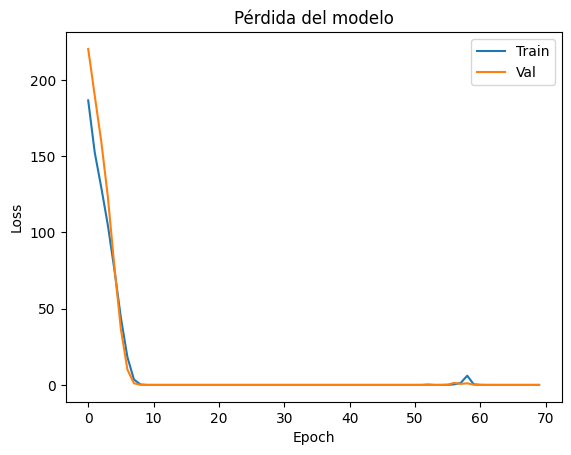

In [ ]:
plot_acc(historial)
plot_loss(historial)

Predicciones de prueba

In [ ]:
resultado = modelo.predict([100.0])
print("Prediccion: 100 grados fahrenheut son " + str(resultado) + " celsius")

1/1 [==============================] - 0s 117ms/step
Prediccion: 100 grados celsius son [[37.76671]] fahrenheit!


Exportar el modelo en formato h5

In [ ]:
modelo.save('fahrenheit2celsius.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#El equipo es Linux. Listemos el contenido de la carpeta actual para ver que se exporto el modelo
!ls

fahrenheit2celsius.h5  sample_data


Para convertirlo a tensorflow.js, primero debemos instalar la libreria

In [ ]:
!pip install tensorflowjs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 48.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 83.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 102.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 94.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 100.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 60.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 37.1 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packaging-24.0:
      Successfully uninstalled packaging-24.0
  Attempting uninstall: ml-dtypes
  

Crear carpeta donde se colocaran los archivos resultantes

In [ ]:
!mkdir carpeta_salida

mkdir: cannot create directory ‘carpeta_salida’: File exists


Realizar la exportacion a la carpeta de salida

In [ ]:
!tensorflowjs_converter --input_format keras fahrenheit2celsius.h5 carpeta_salida

2024-04-28 10:49:17.815779: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-28 10:49:18.894446: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Confirmar que en la carpeta de salida se hayan generado los archivos. Deben aparecer archivos "bin" y "json"

In [ ]:
!ls carpeta_salida